### import 및 데이터 불러오기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
# notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 코드

In [3]:
df = pd.read_csv('./titanic.csv')

#### 변수 설명입니다.
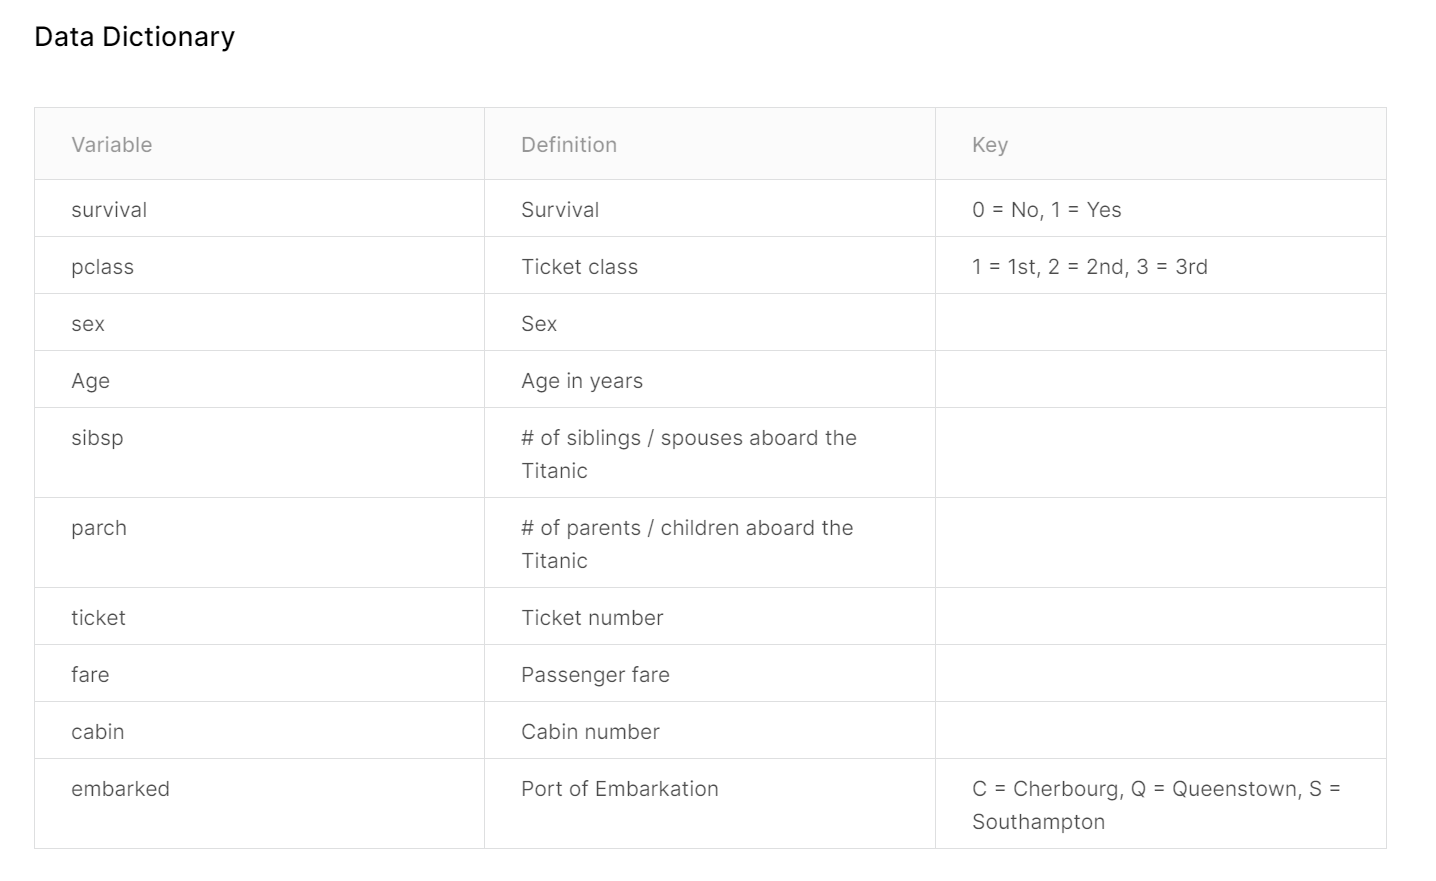

### 1. 데이터 형태 파악

In [4]:
#한 코드 내에서 여러 DataFrame을 보고 싶으면 꼭 display를 사용해주세요!

display(df.head())
display(df.tail())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
#df만 입력해서 head와 tail을 한 번에 볼 수도 있습니다.
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### 2. 각 변수의 타입 파악
* int64: 정수형 데이터
* float64: 실수형 데이터
* object: 문자열 데이터

In [6]:
#pd.DataFrame.info() : 데이터 수, 각 column의 이름과 정상데이터 수, 데이터 타입 등 표시해줌
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
# dtype을 활용해 컬럼별 데이터 타입을 확인할 수 있습니다.
print(df["PassengerId"].dtype)
print(df["Age"].dtype)
print(df["Name"].dtype)

int64
float64
object


In [8]:
# 행과 열의 개수
df.shape

(891, 12)

In [9]:
# unique 활용
print("---Passenger Id---\n",df["PassengerId"].unique()[:10])
print("\n---Age---\n",df["Age"].unique()[:10])
print("\n---Name---\n",df["Name"].unique()[:10])


---Passenger Id---
 [ 1  2  3  4  5  6  7  8  9 10]

---Age---
 [22. 38. 26. 35. nan 54.  2. 27. 14.  4.]

---Name---
 ['Braund, Mr. Owen Harris'
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
 'Heikkinen, Miss. Laina' 'Futrelle, Mrs. Jacques Heath (Lily May Peel)'
 'Allen, Mr. William Henry' 'Moran, Mr. James' 'McCarthy, Mr. Timothy J'
 'Palsson, Master. Gosta Leonard'
 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)'
 'Nasser, Mrs. Nicholas (Adele Achem)']


### 3. 결측치 확인하기

In [10]:
#결측치의 수
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
#결측치 비율
df.isnull().sum() / len(df) *100
#(df.isnull().sum() / len(df) *100).round(2)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [15]:
# msno 사용하면 좀 더 예쁘게 결측치 볼 수 있어요
import missingno as msno

<AxesSubplot:>

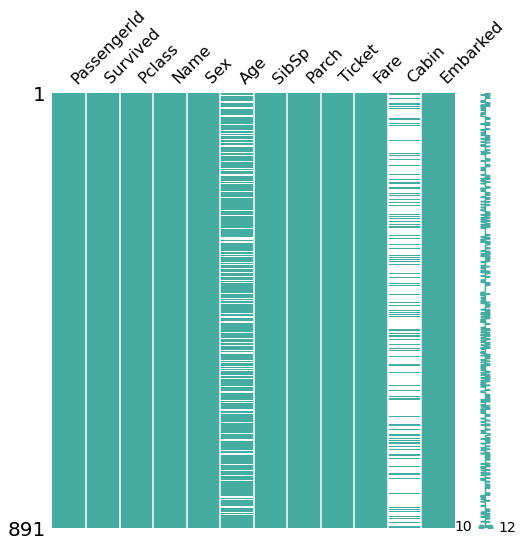

In [16]:
msno.matrix(df=df, figsize=(8, 8), color=(70/255, 172/255, 161/255))

### 4. 이상치 확인하기

In [17]:
#기초 데이터 요약
df["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<AxesSubplot:>

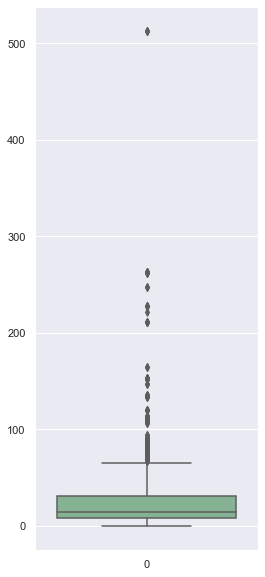

In [18]:
sns.set() #plt를 sns 설정으로 유지
plt.figure(figsize=(4,10)) #피겨 사이즈 설정
sns.set_palette("crest") #팔레트 설정
sns.boxplot(data=df["Fare"]) #상자그림 이용

In [19]:
df[df["Fare"] > 100]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.00,3,2,19950,263.0000,C23 C25 C27,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.00,3,2,19950,263.0000,C23 C25 C27,S
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.00,0,1,PC 17558,247.5208,B58 B60,C
195,196,1,1,"Lurette, Miss. Elise",female,58.00,0,0,PC 17569,146.5208,B80,C
215,216,1,1,"Newell, Miss. Madeleine",female,31.00,1,0,35273,113.2750,D36,C
258,259,1,1,"Ward, Miss. Anna",female,35.00,0,0,PC 17755,512.3292,NaN,C
268,269,1,1,"Graham, Mrs. William Thompson (Edith Junkins)",female,58.00,0,1,PC 17582,153.4625,C125,S
269,270,1,1,"Bissette, Miss. Amelia",female,35.00,0,0,PC 17760,135.6333,C99,S
297,298,0,1,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S


### 5. 종속변수 확인하기
kaggle에서는 타이타닉 데이터로 survived를 예측하는 문제를 냅니다.  
즉 survived 값이 종속변수, 다른 값들이 독립변수

In [20]:
df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

/Users/antares/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

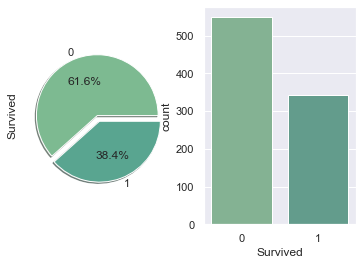

In [21]:
f, ax = plt.subplots(1,2) #subplots: 여러 그래프를 한번에 볼때
df['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
sns.countplot("Survived", data = df, ax = ax[1])

### 6. 각 변수의 분포 살펴보기

* Pclass: 자리 등급을 나타내는 데이터 (1,2,3등급)  

Pclass에 따라 몇명이 생존했는지를 나타내봅시다

In [22]:
display(df["Pclass"].value_counts())
display(df[["Pclass", "Survived"]].groupby(["Pclass"]).sum())

3    491
1    216
2    184
Name: Pclass, dtype: int64

,Survived
Pclass,
1,136
2,87
3,119


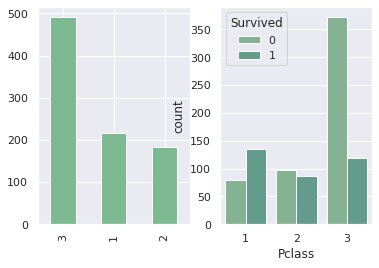

In [22]:
# 숫자로도 파악할 수 있지만, 그래프로 보면 더 직관적이에요
f,ax = plt.subplots(1,2)
df["Pclass"].value_counts().plot(kind = "bar", ax = ax[0]) #bar plot
sns.countplot(x = "Pclass", hue = "Survived", data = df, ax = ax[1]) #count plot 

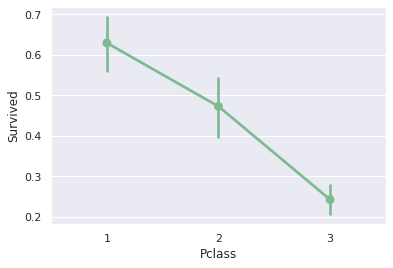

In [23]:
sns.pointplot(x = "Pclass", y = "Survived", data = df) #point plot

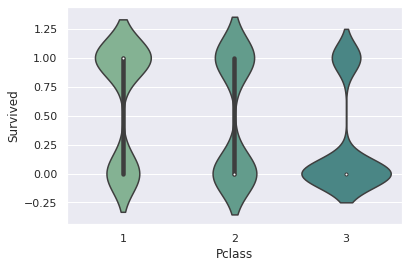

In [24]:
sns.violinplot(x = "Pclass", y = "Survived", data = df) #violin plot

* Sex

성별에 따라선 어떻게 다른지 비교해봅시다

In [28]:
df.groupby(['Survived', 'Sex'])['Cabin'].count()

Survived  Sex   
0         female     6
          male      62
1         female    91
          male      45
Name: Cabin, dtype: int64

In [27]:
df.groupby(['Survived','Sex'])['Survived'].count()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Survived, dtype: int64

/Users/antares/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


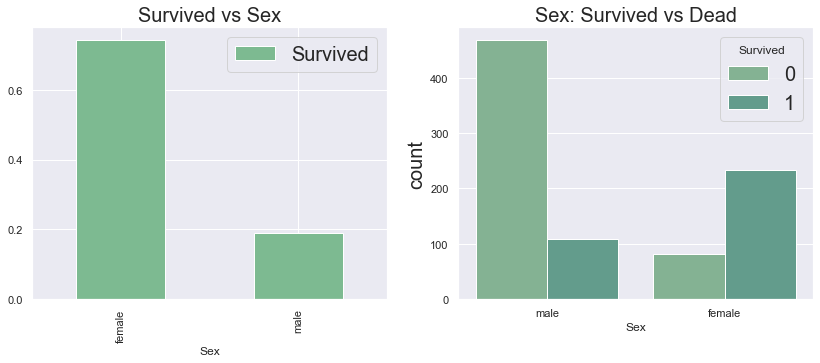

In [29]:
f, ax = plt.subplots(1, 2, figsize=(14, 5))
plt.rc("axes", titlesize = 20) #rc: runtime configuration
plt.rc("legend", fontsize = 20)
plt.rc("ytick", labelsize = 20)
plt.ylabel('y',size=20)
df[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data=df, ax=ax[1]) #hue: 나누어서 보고싶은 구분변수기준
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

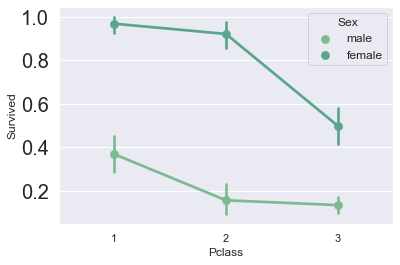

In [30]:
# 두개를 동시에 볼 수도 있어요
plt.rc("legend", fontsize = 12)
sns.pointplot(x = "Pclass", y = "Survived", hue = "Sex", data = df)

* Age

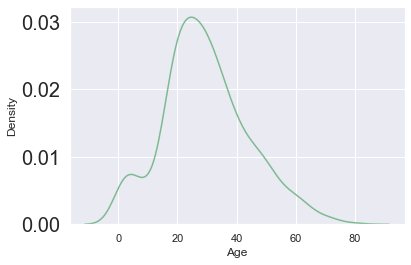

In [31]:
sns.kdeplot(df['Age']) #확률밀도함수
plt.show()

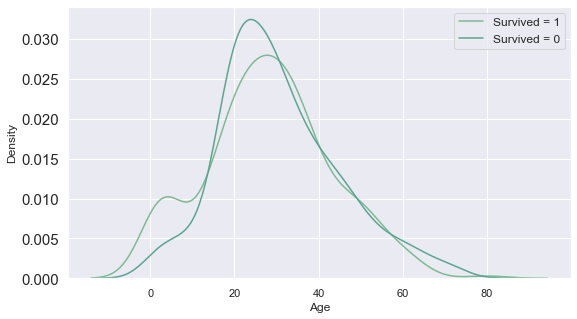

In [32]:
plt.rc("ytick", labelsize = 15)
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df[df['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(df[df['Survived'] == 0]['Age'], ax=ax) #plt는 여러개를 이어서 쓰면 플롯이 쌓여요!
plt.legend(['Survived = 1', 'Survived = 0'])
plt.show()

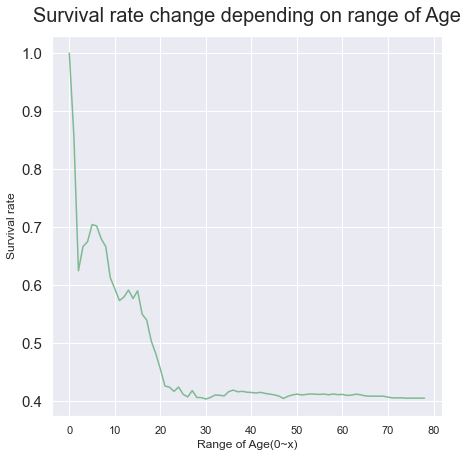

In [33]:
cummulate_survival_ratio = []
for i in range(1, 80):
    cummulate_survival_ratio.append(df[df['Age'] < i]['Survived'].sum() / len(df[df['Age'] < i]['Survived']))
    
plt.figure(figsize=(7, 7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

<AxesSubplot:xlabel='Survived', ylabel='Age'>

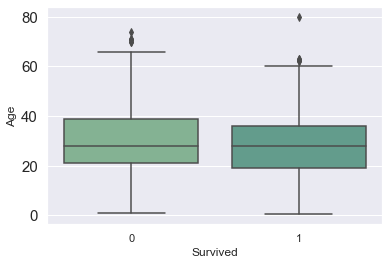

In [34]:
sns.boxplot( x = "Survived", y = "Age", data = df)

* Embarked

<AxesSubplot:xlabel='Embarked', ylabel='Fare'>

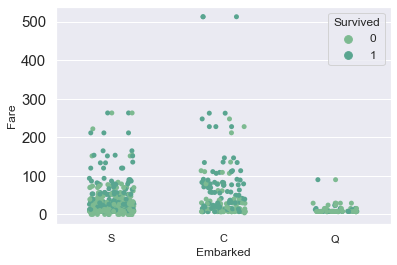

In [35]:
sns.stripplot( x = "Embarked", y = "Fare", hue = "Survived", data = df, jitter = 0.2)

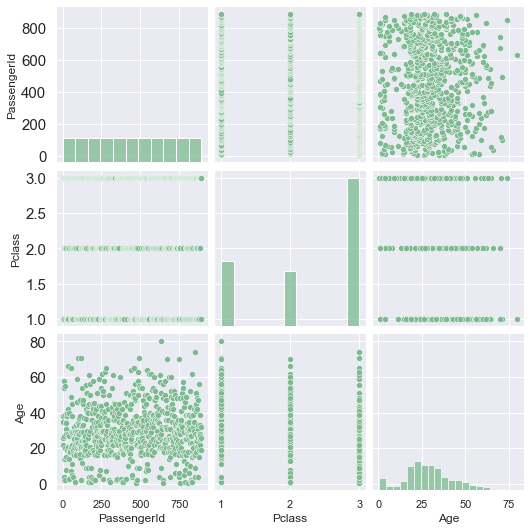

In [36]:
# 이렇게 한번에 그려볼 수도 있어요
# 대각성분은 histogram, 나머지는 scatterplot입니다
sns.pairplot(df, vars = ["PassengerId","Pclass","Age"])

(10.5, -0.5)

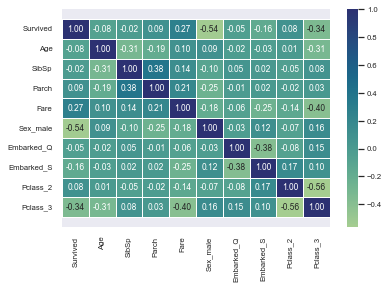

In [37]:
df_ml = df.copy()

df_ml = pd.get_dummies(df_ml, columns=['Sex', 'Embarked', 'Pclass'], drop_first=True)
# 필요없는 column과 na값 drop
df_ml.drop(['PassengerId','Name','Ticket', 'Cabin'],axis=1,inplace=True)
df_ml.dropna(inplace=True)

sns.set(font_scale = 0.7)
ax = sns.heatmap(df_ml.corr(), annot = True, fmt = ".2f", linewidths = 1, cmap="crest")
buttom, top = ax.get_ylim()
ax.set_ylim(buttom + 0.5, top - 0.5)